## ANLY 590 HW 2

### Xunge Jiang netid xj64

### 10/27

## Problem 1: FeedForward

#### 1.1

<img src="IMG_0002.jpg">

#### 1.2
$y = v_1 h_1 + v_2 h_2 + v_3 h_3 + c $

$h_1 = max(0, w_{11}x_1 + w_{21}x_2 + b_1)$

$h_2 = max(0, w_{12}x_1 + w_{22}x_2 + b_2)$

$h_3 = max(0, w_{13}x_1 + w_{23}x_2 + b_2)$


#### 1.3

In [1]:
import numpy as np

# ReLU function
def ReLU(x):
    return np.maximum(0, x)

# Sigmoid function - binary classification 
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def ff_nn_ReLU(x, w, v, b_1, c):
    '''
    A simple 2 layer neural network with ReLU activation and binary output.
    '''
    a = np.dot(x,w) + b_1
    h = ReLU(a)
    y = sigmoid(np.dot(h,v) + c)

    return np.array(y)

#### 1.4

In [2]:
w = np.matrix([[1, -1, 0],
              [0, 0, 0.5]])

b_1 = np.array([0, 0, 1])

v = np.array([[1], 
              [0], 
              [-1]])

c = np.array([[1]])
x = np.matrix([[1, -1], 
               [0, -1],
               [0, 1]])

print('class probabilities is:')
ff_nn_ReLU(x, w, v, b_1, c)

class probabilities is:


array([[0.81757448],
       [0.62245933],
       [0.37754067]])

## Problem 2

#### 2.1
$\frac{\partial f(x, y)}{\partial x} = -3x^2 - 200*(y^2-x)$ <br />
$\frac{\partial f(x, y)}{\partial y} = 400y*(y^2-x)$

#### 2.2

In [3]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3) + 100*(Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

#### 2.3

In [4]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 200*(y**2 - x)
    df_dy = 400*y*(y**2-x)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

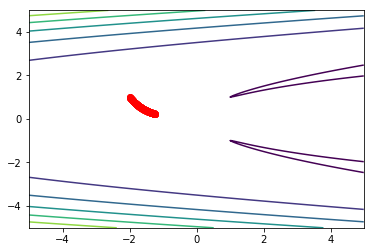

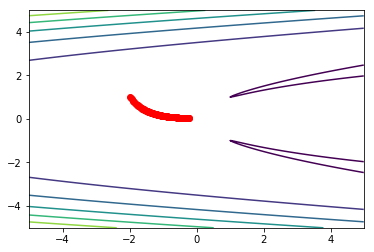

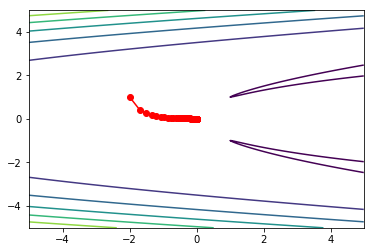

In [5]:
np.random.seed(10)

traj = grad_descent(starting_point = [-2, 1],iterations=200, learning_rate=0.00001)
traj1 = grad_descent(starting_point = [-2, 1],iterations=200, learning_rate=0.00005)
traj2 = grad_descent(starting_point = [-2, 1], iterations=200, learning_rate=0.0005)

traj = [traj, traj1, traj2]

for i in traj:
    
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= i[:,0]
    y= i[:,1]
    plt.plot(x,y,'-o', color = 'red')

#### 2.4

In [6]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(2)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

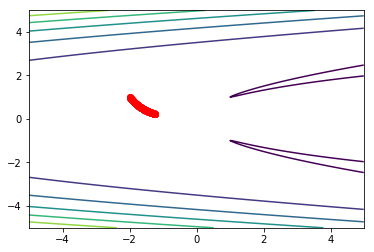

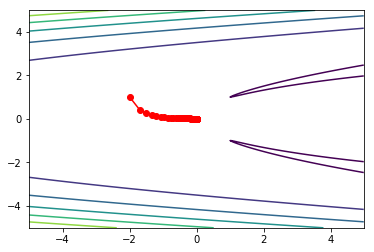

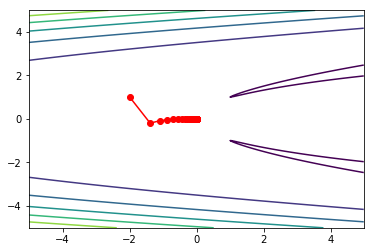

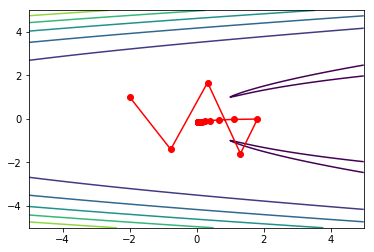

In [7]:
np.random.seed(10)

traj = grad_descent_with_momentum(starting_point= [-2, 1], iterations=200, epsilon=0.00001, alpha=.001)
traj1 = grad_descent_with_momentum(starting_point = [-2, 1], iterations=200, epsilon=0.0005, alpha=.002)
traj2 = grad_descent_with_momentum(starting_point = [-2, 1], iterations=200, epsilon=0.001, alpha=.0001)
traj3 = grad_descent_with_momentum(starting_point = [-2, 1], iterations=200, epsilon=0.002, alpha=.00002)

traj = [traj, traj1, traj2, traj3]

for i in traj:
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= i[:,0]
    y= i[:,1]
    plt.plot(x,y,'-o', color = 'red')

## Problem 3

#### 3.1

Loss Function for Sigmoid Function: 

$L = -y_{i}log(\hat y_{i}) - (1-y_{i})log(1-\hat y_i)$

$\frac{d}{dx} ReLU(x)$ = 1 if x $\geq$ 0, else = 0

$\frac{\partial L}{\partial w_{11}} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial out_1} \frac{dout_1}{din_1} \frac{\partial in_1}{\partial w_{11}} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \hat y(1-\hat y) \cdot v_1 \cdot \frac{d}{dx} ReLU(x_1w_{11} + x_2w_{21} + b_1) \cdot x_1 = (\hat y - y) \cdot v_1 \cdot \frac{d}{dx} ReLU(x_1w_{11} + x_2w_{21} + b_1) \cdot x_1$<br />

$\frac{\partial L}{\partial w_{21}} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial out_1} \frac{dout_1}{din_1} \frac{\partial in_1}{\partial w_{21}} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \hat y(1-\hat y)\cdot v_1 \cdot \frac{d}{dx} ReLU(x_1w_{11} + x_2w_{21} + b_1) \cdot x_2 = (\hat y - y) \cdot v_1 \cdot \frac{d}{dx} ReLU(x_1w_{11} + x_2w_{21} + b_1) \cdot x_2 $<br />

$\frac{\partial L}{\partial w_{12}} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial out_2} \frac{dout_2}{din_2} \frac{\partial in_1}{\partial w_{12}} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \hat y(1-\hat y)\cdot v_2 \cdot \frac{d}{dx} ReLU(x_1w_{12} + x_2w_{22} + b_2) \cdot x_1 = (\hat y - y) \cdot v_2 \cdot \frac{d}{dx} ReLU(x_1w_{12} + x_2w_{22} + b_2) \cdot x_1$<br />

$\frac{\partial L}{\partial w_{22}} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial out_2} \frac{dout_2}{din_2} \frac{\partial in_1}{\partial w_{22}} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \hat y(1-\hat y)\cdot v_2 \cdot \frac{d}{dx} ReLU(x_1w_{12} + x_2w_{22} + b_2) \cdot x_2 = (\hat y - y) \cdot v_2 \cdot \frac{d}{dx} ReLU(x_1w_{12} + x_2w_{22} + b_2) \cdot x_2$<br />

$\frac{\partial L}{\partial w_{13}} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial out_3} \frac{dout_3}{din_3} \frac{\partial in_1}{\partial w_{13}} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y_i})\cdot \hat y(1-\hat y)\cdot v_3 \cdot \frac{d}{dx} ReLU(x_1w_{13} + x_2w_{23} + b_3) \cdot x_1 = (\hat y - y) \cdot v_3 \cdot \frac{d}{dx} ReLU(x_1w_{13} + x_2w_{23} + b_3) \cdot x_1 $<br />

$\frac{\partial L}{\partial w_{23}} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial out_3} \frac{dout_3}{din_3} \frac{\partial in_1}{\partial w_{23}} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \hat y(1-\hat y)\cdot v_3 \cdot \frac{d}{dx} ReLU(x_1w_{13} + x_2w_{23} + b_3) \cdot x_2 = (\hat y - y) \cdot v_3 \cdot \frac{d}{dx} ReLU(x_1w_{13} + x_2w_{23} + b_3) \cdot x_2 $

$\frac{\partial L}{\partial b_{1}} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial out_1} \frac{dout_1}{din_1} \frac{\partial in_1}{\partial b_{1}}  = (\hat y - y) \cdot v_1 \cdot \frac{d}{dx} ReLU(x_1w_{11} + x_2w_{21} + b_1) \cdot 1$<br />

$\frac{\partial L}{\partial b_{2}} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial out_2} \frac{dout_2}{din_2} \frac{\partial in_1}{\partial b_{2}} = (\hat y - y) \cdot v_2 \cdot \frac{d}{dx} ReLU(x_1w_{12} + x_2w_{22} + b_2) \cdot 1$<br />

$\frac{\partial L}{\partial b_{3}} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial out_3} \frac{dout_3}{din_3} \frac{\partial in_1}{\partial b_{3}} = (\hat y - y) \cdot v_3 \cdot \frac{d}{dx} ReLU(x_1w_{13} + x_2w_{23} + b_3) \cdot 1 $<br />

$\frac{\partial L}{\partial v_1} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial v_1} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \frac{\partial  \sigma(v_1h_1 +v_2h_2 + v_3h_3+c)}{\partial v_1} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \sigma(v_1h_1 +v_2h_2 + v_3h_3+c) (1-\sigma(v_1h_1 +v_2h_2 + v_3h_3+c)) h_1
=(-\frac{y}{\hat y} + \frac{1-y}{1-\hat y}) \frac{h_1 \cdot e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)}}{(1+ e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)})^2}$

$\frac{\partial L}{\partial v_2} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial v_2} = v (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \frac{\partial  \sigma(v_1h_1 +v_2h_2 + v_3h_3+c)}{\partial v_2} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \sigma(v_1h_1 +v_2h_2 + v_3h_3+c) (1-\sigma(v_1h_1 +v_2h_2 + v_3h_3+c)) h_2
= (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\frac{h_2 \cdot e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)}}{(1+ e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)})^2}$

$\frac{\partial L}{\partial v_3} = \frac{dL}{d\hat y} \frac{\partial \hat y}{\partial v_3} = v (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \frac{\partial  \sigma(v_1h_1 +v_2h_2 + v_3h_3+c)}{\partial v_3} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\cdot \sigma(v_1h_1 +v_2h_2 + v_3h_3+c) (1-\sigma(v_1h_1 +v_2h_2 + v_3h_3+c)) h_3
= (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y})\frac{h_3 \cdot e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)}}{(1+ e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)})^2}$

$\frac{\partial L}{\partial c} =\frac{dL}{d\hat y} \frac{\partial \hat y}{\partial c} = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y}) \cdot \frac{1}{1+ e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)}} (1- \frac{1}{1+ e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)}})
 = (-\frac{y}{\hat y} + \frac{1-y}{1-\hat y}) \cdot \frac{e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)}}{(1+ e^{-(v_1h_1 +v_2h_2 + v_3h_3+c)})^2}$

In [8]:
def loss(y, y_hat):
    # binary cross entropy
    L = np.average((-y * np.log(y_hat) - (1-y)*np.log(1-y_hat)))
    return L

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, param_vec):
    # returns model prediction 
    w11, w12, w13, w21, w22, w23, v1, v2, v3, b1, b2, b3, c = param_vec
    w = np.array([[w11,w12,w13],[w21,w22,w23]])
    b = np.array([b1,b2,b3])
    v = np.array([[v1],[v2],[v3]])
    
    h = relu(np.dot(x, w) + b)
    y_hat = sigmoid(np.dot(h, v) + c)
    return y_hat

def binary_xent_residual(y, y_hat):
    return (-y/y_hat + (1-y)/(1-y_hat))

#### 3.2

In [16]:
def grad_f(param_vec, x, y):
    
    w11, w12, w13, w21, w22, w23, v1, v2, v3, b1, b2, b3, c = param_vec
    
    w = np.array([[w11, w12, w13],[w21, w22, w23]])
    b = np.array([b1, b2, b3])
    v = np.array([[v1],[v2],[v3]])
    
    # xw + b
    a = np.dot(x, w) + b
    a1 = a[:,0].reshape((a.shape[0],1))
    a2 = a[:,1].reshape((a.shape[0],1))
    a3 = a[:,2].reshape((a.shape[0],1))

    # hidden layer
    H = relu(a)
    H1 = H[:,0].reshape((H.shape[0],1))
    H2 = H[:,1].reshape((H.shape[0],1))
    H3 = H[:,2].reshape((H.shape[0],1))

    # sigmoid activation output layer 
    out = np.dot(H, v) + c
    y_hat = sigmoid(out)
    
    # vector v 
    d_v1 = np.average(H1*(binary_xent_residual(y, y_hat)*sigmoid_derivative(out)))
    d_v2 = np.average(H2*(binary_xent_residual(y, y_hat)*sigmoid_derivative(out)))
    d_v3 = np.average(H3*(binary_xent_residual(y, y_hat)*sigmoid_derivative(out)))
    
    # vector c 
    d_c = np.average(binary_xent_residual(y, y_hat)*sigmoid_derivative(out))
    
    # vector w 
    d_w11 = np.average(x[:,0].reshape((x.shape[0],1))*(y_hat-y)*v1*relu_derivative(a1))
    d_w21 = np.average(x[:,1].reshape((x.shape[0],1))*(y_hat-y)*v1*relu_derivative(a1))
    d_w12 = np.average(x[:,0].reshape((x.shape[0],1))*(y_hat-y)*v2*relu_derivative(a2))
    d_w22 = np.average(x[:,1].reshape((x.shape[0],1))*(y_hat-y)*v2*relu_derivative(a2))
    d_w13 = np.average(x[:,0].reshape((x.shape[0],1))*(y_hat-y)*v3*relu_derivative(a3))
    d_w23 = np.average(x[:,1].reshape((x.shape[0],1))*(y_hat-y)*v3*relu_derivative(a3))
    
    # vector b
    d_b1 = np.average((y_hat-y)*v1*relu_derivative(a1))
    d_b2 = np.average((y_hat-y)*v2*relu_derivative(a2))
    d_b3 = np.average((y_hat-y)*v3*relu_derivative(a3))

    return np.array([d_w11,d_w12,d_w13,d_w21,d_w22,d_w23,d_v1,d_v2,d_v3,d_b1,d_b2,d_b3,d_c])

#### 3.3

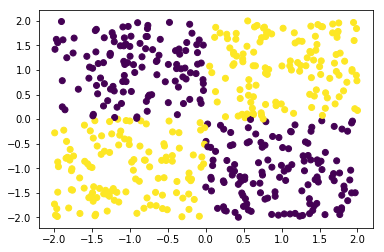

In [17]:
# generate XOR dataset
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

#### 3.4

In [18]:
def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=13).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, point))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, point)))
    return (np.array(trajectory), losses)

In [12]:
traj, losses = grad_descent(x, y, iterations=500, learning_rate = 0.1)

Text(0.5,0,'Iteration')

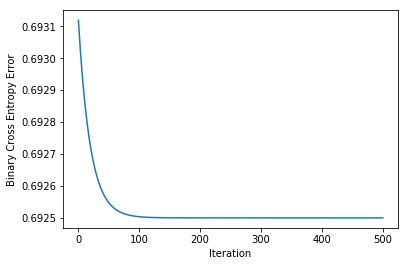

In [13]:
plt.plot(losses)
plt.ylabel("Binary Cross Entropy Error")
plt.xlabel("Iteration")

#### 3.5

In [14]:
# with momentum 
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=13).astype("float128")
    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x, point))]
        
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, point)))
    return (np.array(trajectory), losses)

Text(0.5,0,'Iteration')

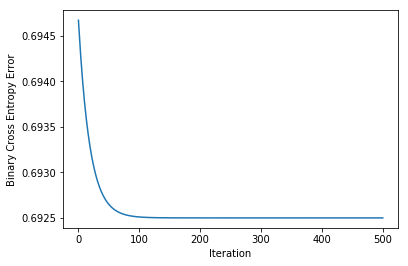

In [15]:
traj, losses = grad_descent_with_momentum(x, y, iterations=500, alpha=.05, epsilon=0.1)
plt.plot(losses)
plt.ylabel("Binary Cross Entropy Error")
plt.xlabel("Iteration")

Since grad descent with momentum starts with bigger error but then converge to the same location using around same number of iterations as grad_descent without momentum, gradient descent with momentum converges a little more efficiently.

#### 3.6

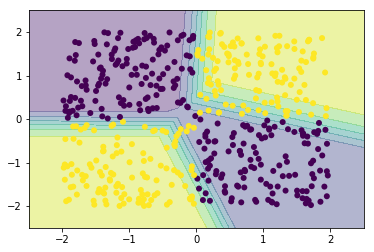

In [26]:
x_span = np.linspace(-2.5, 2.5, 1000)
y_span = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(x_span, y_span)
labels = yhat(np.c_[xx.ravel(), yy.ravel()], traj[-1])
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.4)
# Get predicted labels on training data and plot
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()